In [95]:
import csv

import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split

RANDOM_SEED = 42

# Specify each path

In [96]:
dataset = 'model/keypoint_classifier/keypoint.csv'
# model_save_path = 'model/keypoint_classifier/keypoint_classifier.hdf5'
model_save_path = 'model/keypoint_classifier/keypoint_classifier.keras'
tflite_save_path = 'model/keypoint_classifier/keypoint_classifier.tflite'

# Set number of classes

In [97]:
NUM_CLASSES = 7

# Dataset reading

In [98]:
X_dataset = np.loadtxt(dataset, delimiter=',', dtype='float32', usecols=list(range(1, (478 * 2) + 1)))

In [99]:
y_dataset = np.loadtxt(dataset, delimiter=',', dtype='int32', usecols=(0))

In [100]:
X_train, X_test, y_train, y_test = train_test_split(X_dataset, y_dataset, train_size=0.8, random_state=RANDOM_SEED)

# Model building

In [101]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input((478 * 2, )),
    tf.keras.layers.Dense(64, activation='selu', kernel_initializer='lecun_normal'),
    tf.keras.layers.Dense(32, activation='selu', kernel_initializer='lecun_normal'),
    tf.keras.layers.Dense(16, activation='selu', kernel_initializer='lecun_normal'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(NUM_CLASSES, activation='softmax')
])

# model = tf.keras.models.Sequential([
#     tf.keras.layers.Input((478 * 2, )),
#     tf.keras.layers.Dense(20, activation='elu'),
#     tf.keras.layers.Dropout(0.5),
#     tf.keras.layers.Dense(10, activation='elu'),
#     tf.keras.layers.Dense(NUM_CLASSES, activation='softmax')
# ])

# Redesigned Model
# model = tf.keras.models.Sequential([
#     tf.keras.layers.Input((478 * 2, )),
#     tf.keras.layers.Dense(128, activation='relu'), # Increased neurons, changed activation
#     tf.keras.layers.Dropout(0.4),                 # Slightly reduced dropout
#     tf.keras.layers.Dense(64, activation='relu'),  # Added another dense layer
#     tf.keras.layers.Dropout(0.3),
#     tf.keras.layers.Dense(32, activation='relu'),  # Added another dense layer
#     tf.keras.layers.Dense(NUM_CLASSES, activation='softmax')
# ])

In [102]:
model.summary()  # tf.keras.utils.plot_model(model, show_shapes=True)

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_16 (Dense)                │ (None, 64)             │        61,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 7)              │           119 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 63,975 (249.90 KB)

 Trainable params: 63,975 (249.90 KB)

 Non-trainable params: 0 (0.00 B)

In [103]:
# Model checkpoint callback
cp_callback = tf.keras.callbacks.ModelCheckpoint(
    model_save_path, verbose=1, save_weights_only=False)
# Callback for early stopping
es_callback = tf.keras.callbacks.EarlyStopping(patience=20, verbose=1)

In [104]:
# Model compilation
opt = tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(
    optimizer=opt,
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Model training

In [105]:
model.fit(
    X_train,
    y_train,
    epochs=1000,
    # batch_size=128,
    batch_size=10,
    validation_data=(X_test, y_test),
    callbacks=[cp_callback, es_callback]
)

Epoch 1/1000


 1/17 ━━━━━━━━━━━━━━━━━━━━ 12s 765ms/step - accuracy: 0.1000 - loss: 2.2356
Epoch 1: saving model to model/keypoint_classifier/keypoint_classifier.keras
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.1477 - loss: 2.5275 - val_accuracy: 0.1163 - val_loss: 2.4356
Epoch 2/1000
 1/17 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.1000 - loss: 2.7999
Epoch 2: saving model to model/keypoint_classifier/keypoint_classifier.keras
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.1447 - loss: 2.3924 - val_accuracy: 0.1163 - val_loss: 2.1773
Epoch 3/1000
 1/17 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.1000 - loss: 2.1598
Epoch 3: saving model to model/keypoint_classifier/keypoint_classifier.keras
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.1268 - loss: 2.3266 - val_accuracy: 0.1395 - val_loss: 1.9071
Epoch 4/1000
 1/17 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.1000 - loss: 2.2648
Epoch 4: saving model to model/keypoint_classifier/keypoint_classifier.keras
17/17 ━━━

In [106]:
# Model evaluation
val_loss, val_acc = model.evaluate(X_test, y_test, batch_size=128)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.7209 - loss: 0.8459


In [107]:
# Loading the saved model
model = tf.keras.models.load_model(model_save_path)

In [108]:
# Inference test
predict_result = model.predict(np.array([X_test[0]]))
print(np.squeeze(predict_result))
print(np.argmax(np.squeeze(predict_result)))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
[0.5056731  0.19702493 0.00268278 0.00363864 0.04071433 0.2497054
 0.00056075]
0


# Confusion matrix

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


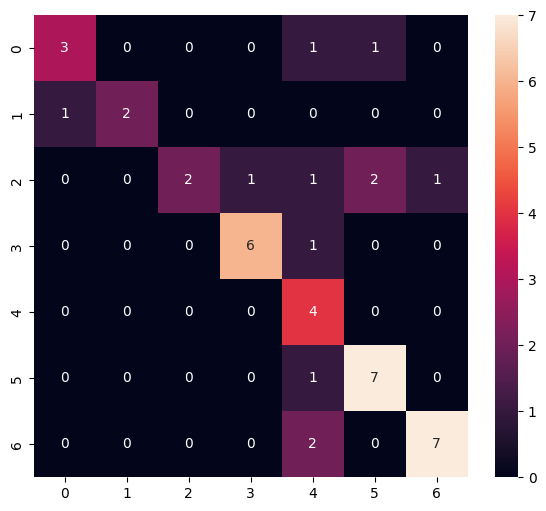

Classification Report
              precision    recall  f1-score   support

           0       0.75      0.60      0.67         5
           1       1.00      0.67      0.80         3
           2       1.00      0.29      0.44         7
           3       0.86      0.86      0.86         7
           4       0.40      1.00      0.57         4
           5       0.70      0.88      0.78         8
           6       0.88      0.78      0.82         9

    accuracy                           0.72        43
   macro avg       0.80      0.72      0.71        43
weighted avg       0.81      0.72      0.72        43



In [109]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

def print_confusion_matrix(y_true, y_pred, report=True):
    labels = sorted(list(set(y_true)))
    cmx_data = confusion_matrix(y_true, y_pred, labels=labels)
    
    df_cmx = pd.DataFrame(cmx_data, index=labels, columns=labels)
 
    fig, ax = plt.subplots(figsize=(7, 6))
    sns.heatmap(df_cmx, annot=True, fmt='g' ,square=False)
    ax.set_ylim(len(set(y_true)), 0)
    plt.show()
    
    if report:
        print('Classification Report')
        print(classification_report(y_test, y_pred))

Y_pred = model.predict(X_test)
y_pred = np.argmax(Y_pred, axis=1)

print_confusion_matrix(y_test, y_pred)

# Convert to model for Tensorflow-Lite

In [110]:
# Save as a model dedicated to inference
model.save(model_save_path, include_optimizer=False)

In [111]:
# Transform model (quantization)

converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_quantized_model = converter.convert()

open(tflite_save_path, 'wb').write(tflite_quantized_model)

INFO:tensorflow:Assets written to: C:\Users\effax\AppData\Local\Temp\tmp_zj83zcr\assets


INFO:tensorflow:Assets written to: C:\Users\effax\AppData\Local\Temp\tmp_zj83zcr\assets


Saved artifact at 'C:\Users\effax\AppData\Local\Temp\tmp_zj83zcr'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 956), dtype=tf.float32, name='input_layer_4')
Output Type:
  TensorSpec(shape=(None, 7), dtype=tf.float32, name=None)
Captures:
  2809226039664: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2809035185792: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2809088608736: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2809088615072: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2809088620000: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2809088717776: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2809088617184: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2809088718656: TensorSpec(shape=(), dtype=tf.resource, name=None)


73016

# Inference test

In [112]:
interpreter = tf.lite.Interpreter(model_path=tflite_save_path)
interpreter.allocate_tensors()

In [113]:
# Get I / O tensor
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

In [114]:
interpreter.set_tensor(input_details[0]['index'], np.array([X_test[0]]))

In [115]:
%%time
# Inference implementation
interpreter.invoke()
tflite_results = interpreter.get_tensor(output_details[0]['index'])

CPU times: total: 0 ns
Wall time: 0 ns


In [116]:
print(np.squeeze(tflite_results))
print(np.argmax(np.squeeze(tflite_results)))

[0.5038843  0.19582598 0.00281162 0.00360777 0.04221912 0.25104806
 0.0006032 ]
0
